In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append("../")
import risk_kit as erk

C:\Users\xinha\Desktop\NYU\6123_Risk_Project\risk_kit.py:41: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "rets":
C:\Users\xinha\Desktop\NYU\6123_Risk_Project\risk_kit.py:45: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
C:\Users\xinha\Desktop\NYU\6123_Risk_Project\risk_kit.py:48: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [10]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

##  (前三种方法）：  Equally Weigthed (EW), Cap-Weighted (CW) and EW-tethered Portfolios

Let us load the **Equally-Weigthed (EW)** and the **Value-Weighted (VW)** 
versions of the returns of the industry portfolios:

In [11]:
ind_rets_cw = erk.get_ind_file(filetype="rets", nind=30, ew=False)
ind_rets_ew = erk.get_ind_file(filetype="rets", nind=30, ew=True)

Notice that here **Value-Weigthed does not regard Value Stocks**, it simply means weigthing by market capitalization as opposite as equally weigthing.

Let us compute the sharpe ratios of these portfolio across each industry and compare them:

In [12]:
risk_free_rate = 0.03
sr = pd.DataFrame({
    "CW": erk.sharpe_ratio(ind_rets_cw["1945":], risk_free_rate, 12), 
    "EW": erk.sharpe_ratio(ind_rets_ew["1945":], risk_free_rate, 12)
})

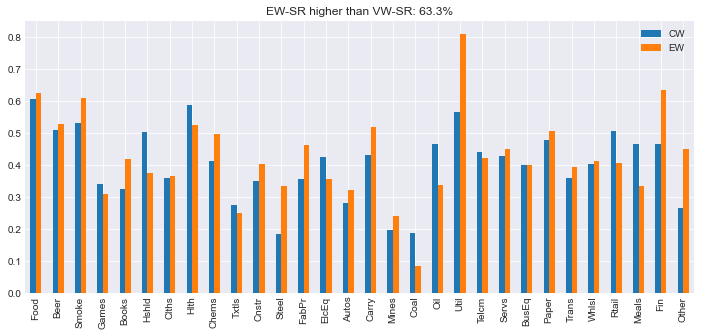

In [13]:
# percentage of times the EW sharpe ratio was higher than the VW sharpe ratio
pew_er = (sr["EW"] > sr["CW"]).sum()/sr.shape[0] * 100

ax = sr.plot.bar(grid=True, figsize=(12,5))
ax.set_title("EW-SR higher than VW-SR: {:.1f}%".format(pew_er))
plt.show()

In [14]:
nind = 49

In [15]:
ind_rets = erk.get_ind_file(filetype="rets", nind=nind)["1974":]
ind_mcap = erk.get_ind_market_caps(nind=nind, weights=True)["1974":]
ind_mcap.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1974-01,0.000757,0.023874,0.014288,0.006235,0.008435,0.004557,0.002918,0.006314,0.087971,0.003453,...,0.016800,0.014330,0.005279,0.046936,0.006213,0.031837,0.020093,0.001807,0.040329,0.044887
1974-02,0.000773,0.025248,0.013489,0.006172,0.008666,0.004958,0.003160,0.006053,0.085401,0.003770,...,0.016839,0.014344,0.005555,0.050377,0.006280,0.031768,0.019675,0.002004,0.040422,0.045171
1974-03,0.000883,0.025604,0.013220,0.006077,0.008796,0.004838,0.003161,0.005738,0.082550,0.003859,...,0.017098,0.015476,0.005700,0.051104,0.006005,0.032384,0.019254,0.001954,0.040982,0.044799
1974-04,0.000891,0.025714,0.012954,0.006074,0.008467,0.005081,0.003358,0.006207,0.084434,0.003871,...,0.017267,0.015057,0.005921,0.049980,0.006376,0.031559,0.018815,0.001956,0.040202,0.044434
1974-05,0.000846,0.026251,0.013041,0.006144,0.008643,0.004822,0.003241,0.006097,0.084895,0.003852,...,0.017598,0.015178,0.006092,0.051341,0.006481,0.031371,0.017868,0.001795,0.039215,0.044104


In [16]:
ind_mcap.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1974-01,0.000757,0.023874,0.014288,0.006235,0.008435,0.004557,0.002918,0.006314,0.087971,0.003453,...,0.016800,0.014330,0.005279,0.046936,0.006213,0.031837,0.020093,0.001807,0.040329,0.044887
1974-02,0.000773,0.025248,0.013489,0.006172,0.008666,0.004958,0.003160,0.006053,0.085401,0.003770,...,0.016839,0.014344,0.005555,0.050377,0.006280,0.031768,0.019675,0.002004,0.040422,0.045171
1974-03,0.000883,0.025604,0.013220,0.006077,0.008796,0.004838,0.003161,0.005738,0.082550,0.003859,...,0.017098,0.015476,0.005700,0.051104,0.006005,0.032384,0.019254,0.001954,0.040982,0.044799
1974-04,0.000891,0.025714,0.012954,0.006074,0.008467,0.005081,0.003358,0.006207,0.084434,0.003871,...,0.017267,0.015057,0.005921,0.049980,0.006376,0.031559,0.018815,0.001956,0.040202,0.044434
1974-05,0.000846,0.026251,0.013041,0.006144,0.008643,0.004822,0.003241,0.006097,0.084895,0.003852,...,0.017598,0.015178,0.006092,0.051341,0.006481,0.031371,0.017868,0.001795,0.039215,0.044104


Note that the **weights=True** in the **erk.get_ind_market_caps** method means that the method return the single industries market cap-weigths as a percentage of the total market capitalization (look inside the method).

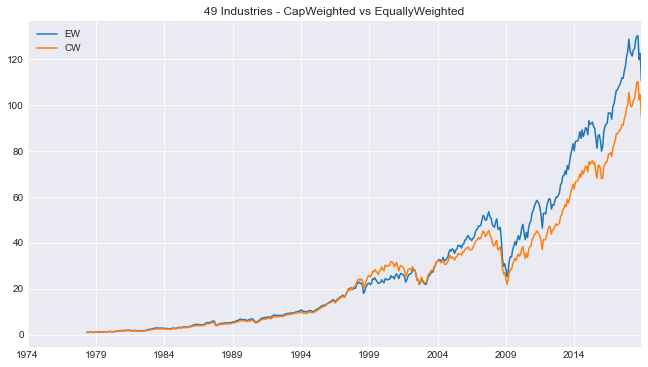

In [17]:
window  = 52
ew_rets = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_ew)
cw_rets = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_cw, cap_ws=ind_mcap)

bt_rets   = pd.DataFrame({"EW": ew_rets, "CW": cw_rets})
bt_growth = (1 + bt_rets).cumprod()
bt_growth.plot(grid=True, figsize=(11,6), title="{} Industries - CapWeighted vs EquallyWeighted".format(nind))
plt.show()

In [18]:
erk.summary_stats( bt_rets.dropna() )

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.122663,0.161935,0.556756,-0.795358,6.611038,0.105574,0.072610,-0.528292
CW,0.118359,0.148906,0.577377,-0.750963,5.643028,0.096617,0.066751,-0.517468


#### Improving EW schemes with CapWeight Tethering

Although very popular, often in practice, purely equally weigthed portfolios are not used 
as such portofolios are constrained in some way, 
for instance, to match the sector weights of the cap-weighted benchmark or to make sure that **microcap stocks are not overweighted**. The motivation for doing so could be to make a portfolio **more tradeable (e.g. some microcaps may not have the liquidity**) or to **improve the tracking error to the Cap-Weighted index**.

We can then **modify the equally weigthed scheme** in order to:
- drop microcap stocks beyond a given threshold, 
- impose a constraint that ensures that the maximum weight assigned to any stock is no more than some multiple of the weight it would be in a cap-weighted portfolio.

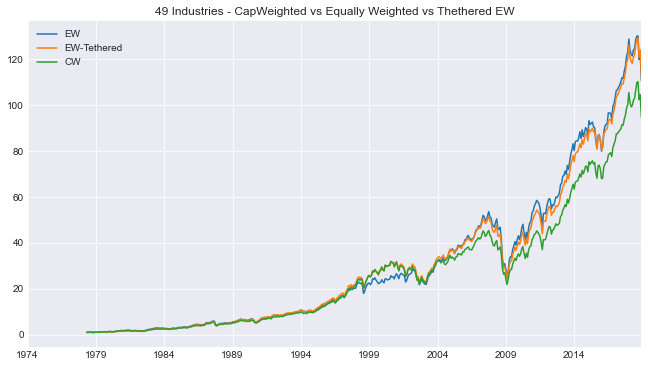

In [19]:
window = 52
ew_rets    = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_ew)
ew_tr_rest = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_ew, cap_ws=ind_mcap, max_cw_mult=5, microcap_thr=0.005)
cw_rets    = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_cw, cap_ws=ind_mcap)

bt_rets    = pd.DataFrame({"EW": ew_rets, "EW-Tethered": ew_tr_rest, "CW": cw_rets})
bt_growth = (1 + bt_rets).cumprod()
bt_growth.plot(grid=True, figsize=(11,6), title="49 Industries - CapWeighted vs Equally Weighted vs Thethered EW")
plt.show()

In [20]:
erk.summary_stats( bt_rets.dropna() )

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.122663,0.161935,0.556756,-0.795358,6.611038,0.105574,0.072610,-0.528292
EW-Tethered,0.123066,0.157609,0.574537,-0.775615,6.170603,0.101989,0.070588,-0.528869
CW,0.118359,0.148906,0.577377,-0.750963,5.643028,0.096617,0.066751,-0.517468


##  4th Method： Risk Parity Portfolio 

### Naive Diversification VS Scientific Diversification

Intuition and portfolio theory suggests that we should hold **well-diversified portfolios**. Like the proverb that we should **not put our eggs in the same basket**.


In [21]:
nind = 49
ind_mkt_caps = erk.get_ind_market_caps(nind=nind, weights=True)
#tot_mkt_ind  = erk.get_total_market_index(nind=nind)

In [22]:
# compute the ENC
enc = (ind_mkt_caps**2).sum(axis=1)**(-1)

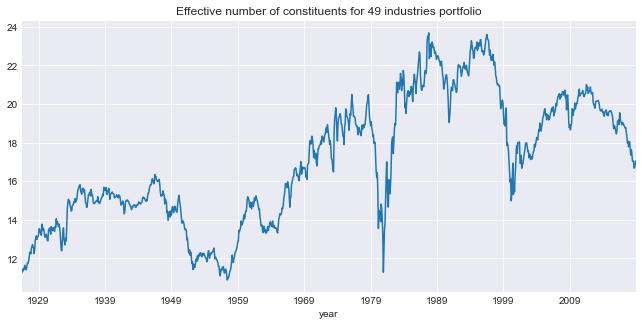

In [23]:
fig, ax = plt.subplots(1,1,figsize=(11,5))
enc.plot(ax=ax, grid=True, title="Effective number of constituents for 49 industries portfolio")
ax.set_xlabel("ENC")
ax.set_xlabel("year")
plt.show()

In [24]:
enc.idxmax(), enc.max(), 

(Period('1987-10', 'M'), 23.68105653443724)

# Risk Contribution and Risk Parity Portfolio

In [25]:
nind = 49
inds = ['Beer','Hlth','Fin','Rtail','Whlsl']
ind_rets = erk.get_ind_file(filetype="rets", nind=nind)["1974":]
ind_mcap = erk.get_ind_market_caps(nind=nind, weights=True)["1974":]
mat_cov  = ind_rets.cov()

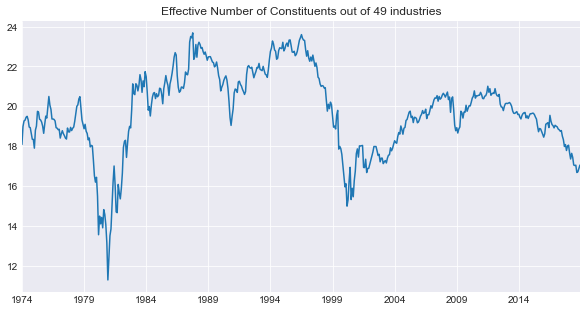

In [26]:
ENC = ind_mcap.T.aggregate( erk.enc )
ENC.plot(grid=True, figsize=(10,5), title="Effective Number of Constituents out of 49 industries")
plt.show()

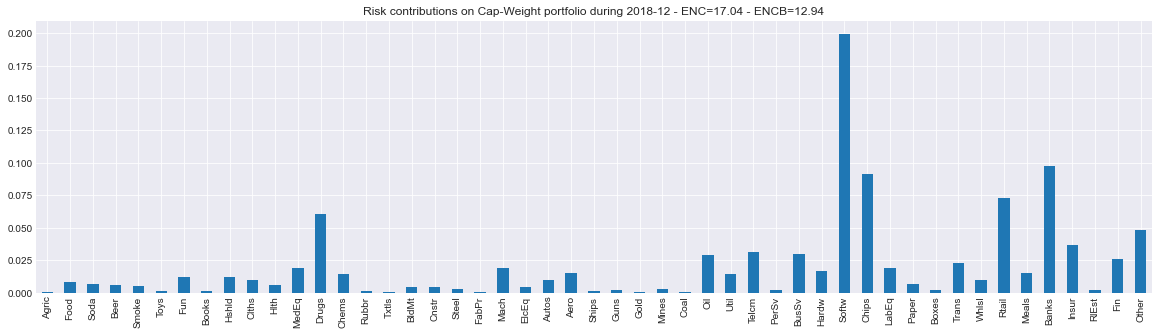

In [27]:
last_weigths = ind_mcap.loc["2018-12"]

# risk contributions on 2018-12
p = erk.portfolio_risk_contributions( last_weigths, mat_cov )

# compute the ENC
ENC = erk.enc(last_weigths)

# compute the ENCB
ENCB = erk.encb(p)

p.plot.bar(grid=True, figsize=(20,5), 
           title="Risk contributions on Cap-Weight portfolio during 2018-12 - ENC={:.2f} - ENCB={:.2f}".format(ENC,ENCB))
plt.show()

Let us see what are the risk contributions if we construct an equally weigthed portfolio, i.e., we assign $w_i=1/49$ for all $i$:

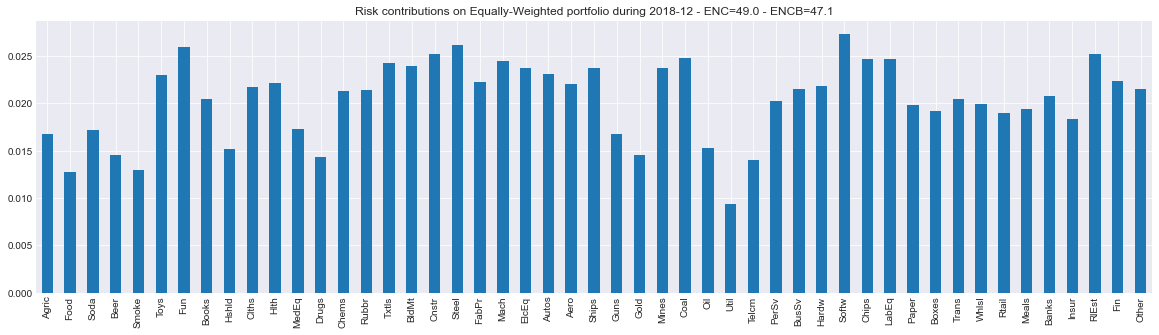

In [28]:
# equally weigths 
ew_weigths = erk.weight_ew(ind_rets) # 1/49

# risk contributions on 2018-12
p = erk.portfolio_risk_contributions( ew_weigths, mat_cov )

# compute the ENC
ENC = erk.enc(ew_weigths)

# compute the ENCB
ENCB = erk.encb(p)

p.plot.bar(grid=True, figsize=(20,5), 
           title="Risk contributions on Equally-Weighted portfolio during 2018-12 - ENC={:.1f} - ENCB={:.1f}".format(ENC,ENCB))
plt.show()

We can see that that avery asset component contributes to the risk much more than in the cap-weight case. 
Also, notice that now $\text{ENC}=49$ while the ENCB is also close to $N=49$.

Let us focus on just 5 industries from 2013 for a moment:

In [29]:
ind  = erk.get_ind_file(filetype="rets", nind=nind)["2013":][inds]
mcap = erk.get_ind_market_caps(nind=nind, weights=True)["2013":][inds]
mat_cov = ind.cov()

We can compute the **risk parity portfolio weights** using the following method:

In [30]:
# weigths of a risk parity portfolio
rp_weigths = erk.risk_parity_weigths(mat_cov)
rp_weigths

Beer     0.284976
Hlth     0.176126
Fin      0.169523
Rtail    0.185963
Whlsl    0.183413
dtype: float64

that is, these are the weights for which the risk contributions of the 5 assets would be the same, in particular, equal to $1/5=0.2$. 
To verify this, we use our method:

In [31]:
risk_contribs = erk.portfolio_risk_contributions( rp_weigths , mat_cov )
risk_contribs

Beer     0.199994
Hlth     0.200001
Fin      0.199985
Rtail    0.199891
Whlsl    0.200129
dtype: float64

Let us see what are the ENCs and the ENCBs for this portfolio. By construction, we expect $\text{ENBC}=5$:

In [32]:
ENC  = erk.enc(rp_weigths)
ENCB = erk.encb(risk_contribs)
ENC, ENCB 

(4.780298812455277, 4.999999278788303)

In principle, we can use a quadratic optimizer that returns **the weights of a portfolio whose risk contributions 
are as close as possible to a given input target risk contribution vector**. For example suppose that:

In [33]:
target_risk = pd.Series([0.2, 0.3, 0.3, 0.1, 0.1], index=inds)
target_risk

Beer     0.2
Hlth     0.3
Fin      0.3
Rtail    0.1
Whlsl    0.1
dtype: float64

that is, we would like Beer to contribute for the $20\%$, Health for the $30\%$, and so on. Then we can call the following method:

In [34]:
weights = erk.portfolio_risk_contrib_optimizer(target_risk, mat_cov)
weights

array([0.29879105, 0.25494347, 0.24977987, 0.1008565 , 0.09562911])

Right. To verify if the risk contributions of the portfolio constructed with the weigths above are close to the given target risk vector we 
call the portfolio_risk_contributions method:

In [35]:
p_risk_contribs = erk.portfolio_risk_contributions(weights, mat_cov)
p_risk_contribs

Beer     0.199760
Hlth     0.300110
Fin      0.300044
Rtail    0.100063
Whlsl    0.100023
dtype: float64

In [36]:
ENC  = erk.enc(weights)
ENCB = erk.encb(p_risk_contribs)
ENC, ENCB 

(4.237661480027364, 4.166431746111504)

Let us run the usual backtest for the weigthing scheme, where we compare the EW, the CW and the risp parity portfolio:

In [37]:
bt_rets.dropna()

,EW,EW-Tethered,CW
1978-05,0.042408,0.031733,0.023992
1978-06,-0.003588,-0.009222,-0.012583
1978-07,0.067467,0.061827,0.057384
1978-08,0.052518,0.044528,0.042562
1978-09,-0.014716,-0.011522,-0.007690
...,...,...,...
2018-08,0.012539,0.023129,0.031316
2018-09,0.000504,0.003448,0.003578
2018-10,-0.078492,-0.065520,-0.070628
2018-11,0.021790,0.027393,0.020265


Now, let us run a backtest of this risk parity weigthing scheme: 

In [38]:
#### IT TAKES A WHILE
rp_rets = erk.backtest_weight_scheme(ind_rets, window=52, weight_scheme=erk.weight_rp, cov_estimator=erk.sample_cov)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.122663,0.161935,0.556756,-0.795358,6.611038,0.105574,0.072610,-0.528292
EW-Tethered,0.123066,0.157609,0.574537,-0.775615,6.170603,0.101989,0.070588,-0.528869
CW,0.118359,0.148906,0.577377,-0.750963,5.643028,0.096617,0.066751,-0.517468
RP,0.122657,0.150769,0.597979,-0.893232,6.915865,0.098791,0.067814,-0.503764


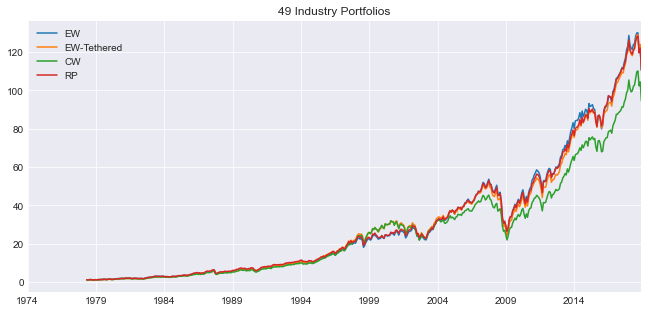

In [39]:
bt_rets["RP"] = rp_rets
wealth = (1 + bt_rets).cumprod()
wealth.plot(grid=True, figsize=(11,5), title="49 Industry Portfolios")
erk.summary_stats( bt_rets.dropna() )

### 5th Method： GMV/ Min Variance Porfolio

### Balancing the GMV portfolio

We recall that **the most attractive portfolio is the MSR portfolio**, but....

Again, let us construct the GMV portfolio consisting of the $49$ industries (data from $1974$):

In [40]:
ind_rets

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1974-01,0.0229,0.0615,-0.0540,-0.0083,0.0301,0.0899,0.0858,-0.0101,-0.0260,0.0965,...,0.0050,0.0048,0.0552,0.0776,0.0144,0.0014,-0.0162,0.1311,0.0083,0.0102
1974-02,0.1382,0.0140,-0.0236,-0.0174,0.0185,-0.0257,-0.0032,-0.0528,-0.0342,0.0230,...,0.0156,0.0787,0.0239,0.0137,-0.0477,0.0165,-0.0219,-0.0249,0.0129,-0.0100
1974-03,-0.0157,-0.0156,-0.0406,-0.0220,-0.0600,0.0517,0.0361,0.0579,-0.0023,-0.0158,...,-0.0151,-0.0485,0.0159,-0.0452,0.0373,-0.0438,-0.0453,-0.0216,-0.0399,-0.0306
1974-04,-0.0926,-0.0265,-0.0415,-0.0366,-0.0277,-0.0749,-0.0796,-0.0646,-0.0419,-0.0477,...,-0.0269,-0.0393,-0.0194,-0.0206,-0.0296,-0.0510,-0.0919,-0.1227,-0.0684,-0.0535
1974-05,-0.0703,-0.0488,-0.0115,-0.0448,0.0559,0.0238,-0.0089,-0.0133,0.0102,-0.0691,...,-0.0130,-0.0469,-0.0390,0.0220,-0.0305,-0.1089,-0.0882,-0.1146,-0.0998,-0.0677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.0715,0.0114,-0.0308,-0.0186,-0.0543,0.0738,0.0250,-0.0463,0.0254,0.0526,...,-0.0062,0.0291,0.0366,0.0911,0.0364,0.0277,0.0352,-0.0423,0.0004,0.0333
2018-09,-0.0392,-0.0220,0.0310,0.0019,0.0537,0.0717,-0.0075,-0.0209,0.0107,0.0130,...,0.0189,0.0105,-0.0148,0.0061,0.0251,-0.0282,0.0116,-0.0492,-0.0340,0.0068
2018-10,-0.0197,0.0095,0.0118,-0.0157,0.0790,-0.1504,-0.1605,-0.0569,-0.0051,-0.1014,...,-0.1100,-0.0975,-0.0788,-0.1021,-0.0171,-0.0613,-0.0413,-0.1213,-0.0455,-0.0515
2018-11,-0.0357,0.0029,0.0684,0.0579,-0.0843,-0.0715,-0.0001,0.0375,0.0644,-0.0099,...,0.1021,0.0617,0.0318,0.0159,0.0616,0.0292,0.0432,0.0715,0.0006,0.0355


In [41]:
ann_ind_rets = erk.annualize_rets(ind_rets, periods_per_year=12)
cov_mat_rets = erk.sample_cov(ind_rets)
gmv_w = erk.minimize_volatility(ann_ind_rets, cov_mat_rets)
enc = (gmv_w**2).sum()**(-1)
print("ENC: {:.2f}".format(enc))

ENC: 4.07


The portfolio, effectively consists of about only $4$ industries (out of total $49$).

### Building the Minimum Variance Portfolio

In [42]:
# minimum variance index portfolio using standard covariance matrix
minvar_rets = erk.backtest_weight_scheme(ind_rets, window=52, weight_scheme=erk.weight_minvar, cov_estimator=erk.sample_cov, periods_per_year=12)


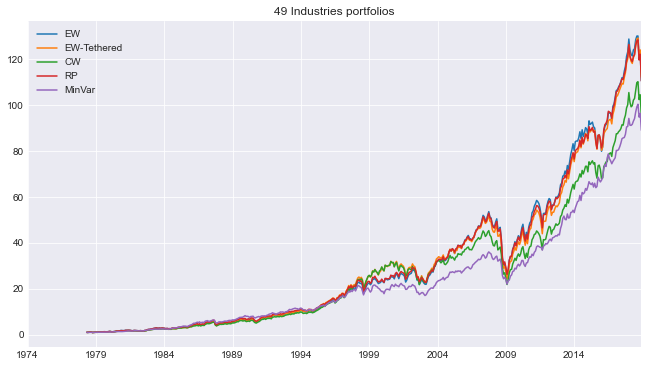

In [43]:
bt_rets["MinVar"]=minvar_rets;
bt_growth = (1 + bt_rets).cumprod()
bt_growth.plot(grid=True, figsize=(11,6), title="49 Industries portfolios")
plt.show()

In [44]:
erk.summary_stats( bt_rets.dropna() )

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.122663,0.161935,0.556756,-0.795358,6.611038,0.105574,0.072610,-0.528292
EW-Tethered,0.123066,0.157609,0.574537,-0.775615,6.170603,0.101989,0.070588,-0.528869
CW,0.118359,0.148906,0.577377,-0.750963,5.643028,0.096617,0.066751,-0.517468
RP,0.122657,0.150769,0.597979,-0.893232,6.915865,0.098791,0.067814,-0.503764
MinVar,0.116698,0.116903,0.721705,-0.687806,5.829639,0.071406,0.050005,-0.389015
